In [113]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [119]:
file_path = "Food_Production.csv"  # Replace with your actual file path if needed
df = pd.read_csv(file_path)

In [121]:
features = ['Land use change', 'Animal Feed', 'Farm', 'Processing', 'Transport', 'Packging', 'Retail']
target = 'Total_emissions'

In [123]:
df_clean = df[features + [target]].dropna()
X = df_clean[features].values
y = df_clean[target].values


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [127]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [129]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Root Mean Squared Error (RMSE): 1.2846
R² Score: 0.9730


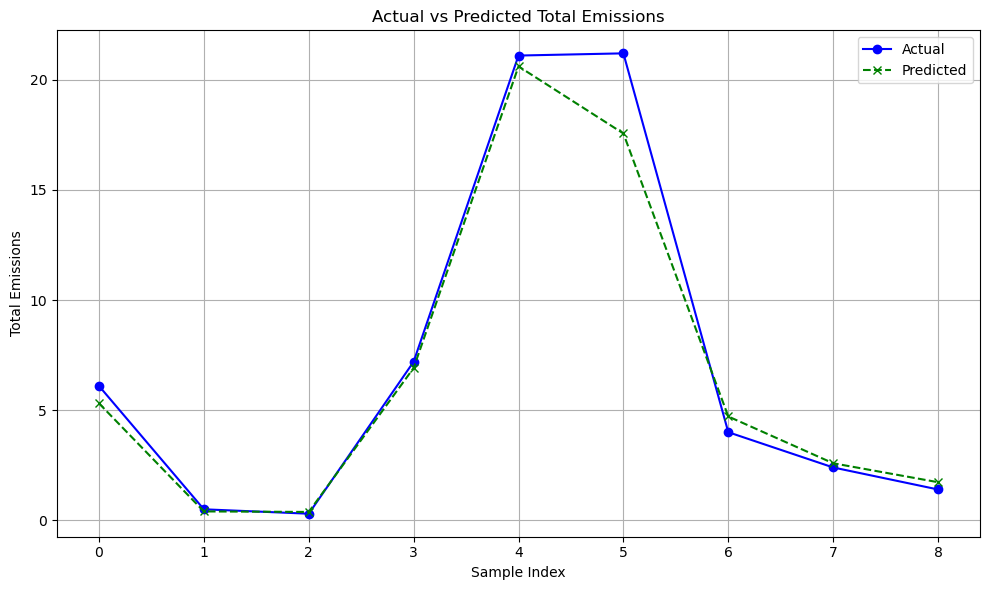

In [131]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue', marker='o')  # Removed .values
plt.plot(y_pred, label='Predicted', color='green', linestyle='--', marker='x')
plt.title('Actual vs Predicted Total Emissions')
plt.xlabel('Sample Index')
plt.ylabel('Total Emissions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [133]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [135]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer
])

C:\Users\siddh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [137]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')


In [139]:
history = model.fit(X_train, y_train, epochs=100, batch_size=4, validation_split=0.1, verbose=0)

In [140]:
y_pred = model.predict(X_test).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


In [141]:
print("Actual vs Predicted Total Emissions:")
for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

Actual vs Predicted Total Emissions:
Actual: 6.10, Predicted: 8.35
Actual: 0.50, Predicted: 0.67
Actual: 0.30, Predicted: 0.36
Actual: 7.20, Predicted: 9.39
Actual: 21.10, Predicted: 21.91
Actual: 21.20, Predicted: 22.91
Actual: 4.00, Predicted: 2.67
Actual: 2.40, Predicted: 1.81
Actual: 1.40, Predicted: 3.32


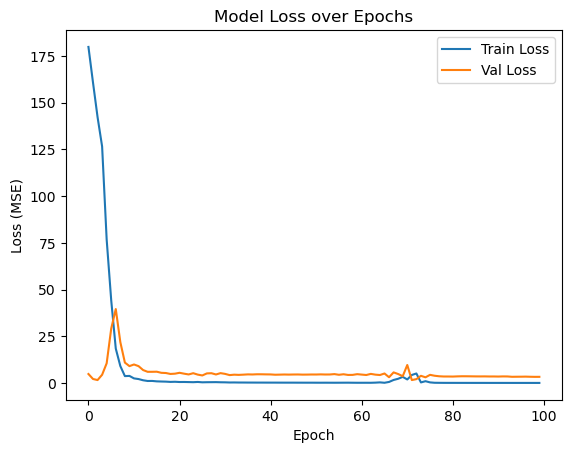

In [142]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [147]:
%history -f Environmental impact of food production.py